In [1]:
import os
import os.path as path
import boto3

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
project_root = os.getcwd()
input_dir = 'input'

log_csv_file_name = 'BGL.csv'
log_csv_file = log_file = path.abspath(path.join(project_root, input_dir, log_csv_file_name))

### EDA on Original Dataset

In [3]:
original_df = pd.read_csv(log_csv_file)
print(original_df.shape)
print(original_df.info())

(4713493, 10)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4713493 entries, 0 to 4713492
Data columns (total 10 columns):
 #   Column          Dtype 
---  ------          ----- 
 0   Anomaly Type    object
 1   Timestamp (ms)  int64 
 2   Date            object
 3   Node            object
 4   Timestamp       object
 5   Node Repeat     object
 6   Message Type    object
 7   Component       object
 8   Level           object
 9   Content         object
dtypes: int64(1), object(9)
memory usage: 359.6+ MB
None


In [4]:
original_df.drop(['Timestamp (ms)', 'Node Repeat'], axis = 1)
original_df['Anomaly Label'] = np.where(original_df['Anomaly Type'] == '-', 0, 1)
original_df['Timestamp'] = pd.to_datetime(original_df['Timestamp'], format='%Y-%m-%d-%H.%M.%S.%f')

original_df.head(n=20)

,Anomaly Type,Timestamp (ms),Date,Node,Timestamp,Node Repeat,Message Type,Component,Level,Content,Anomaly Label
0,-,1117838570,2005.06.03,R02-M1-N0-C:J12-U11,2005-06-03 15:42:50.363779,R02-M1-N0-C:J12-U11,RAS,KERNEL,INFO,instruction cache parity error corrected,0
1,-,1117838570,2005.06.03,R02-M1-N0-C:J12-U11,2005-06-03 15:42:50.527847,R02-M1-N0-C:J12-U11,RAS,KERNEL,INFO,instruction cache parity error corrected,0
2,-,1117838570,2005.06.03,R02-M1-N0-C:J12-U11,2005-06-03 15:42:50.675872,R02-M1-N0-C:J12-U11,RAS,KERNEL,INFO,instruction cache parity error corrected,0
3,-,1117838570,2005.06.03,R02-M1-N0-C:J12-U11,2005-06-03 15:42:50.823719,R02-M1-N0-C:J12-U11,RAS,KERNEL,INFO,instruction cache parity error corrected,0
4,-,1117838570,2005.06.03,R02-M1-N0-C:J12-U11,2005-06-03 15:42:50.982731,R02-M1-N0-C:J12-U11,RAS,KERNEL,INFO,instruction cache parity error corrected,0
5,-,1117838571,2005.06.03,R02-M1-N0-C:J12-U11,2005-06-03 15:42:51.131467,R02-M1-N0-C:J12-U11,RAS,KERNEL,INFO,instruction cache parity error corrected,0
6,-,1117838571,2005.06.03,R02-M1-N0-C:J12-U11,2005-06-03 15:42:51.293532,R02-M1-N0-C:J12-U11,RAS,KERNEL,INFO,instruction cache parity error corrected,0
7,-,1117838571,2005.06.03,R02-M1-N0-C:J12-U11,2005-06-03 15:42:51.428563,R02-M1-N0-C:J12-U11,RAS,KERNEL,INFO,instruction cache parity error corrected,0
8,-,1117838571,2005.06.03,R02-M1-N0-C:J12-U11,2005-06-03 15:42:51.601412,R02-M1-N0-C:J12-U11,RAS,KERNEL,INFO,instruction cache parity error corrected,0
9,-,1117838571,2005.06.03,R02-M1-N0-C:J12-U11,2005-06-03 15:42:51.749199,R02-M1-N0-C:J12-U11,RAS,KERNEL,INFO,instruction cache parity error corrected,0


#### Univariate Analysis

['-' 'APPREAD' 'KERNDTLB' 'KERNMC' 'KERNRTSP' 'KERNSTOR' 'APPCHILD'
 'APPALLOC' 'KERNSOCK' 'MASNORM' 'LINKDISC' 'KERNNOETH' 'KERNTERM'
 'APPUNAV' 'KERNPOW' 'KERNPROG' 'LINKPAP' 'APPBUSY' 'APPTORUS' 'MASABNORM'
 'KERNCON' 'APPSEV' 'MONPOW' 'MONNULL' 'KERNMNT' 'KERNMNTF' 'KERNMICRO'
 'APPRES' 'LINKIAP' 'KERNPAN' 'KERNEXT' 'KERNFLOAT' 'KERNBIT' 'KERNRTSA'
 'MMCS' 'KERNREC' 'KERNSERV' 'MONILL' 'APPTO' 'LINKBLL' 'KERNTLBE'
 'APPOUT']
42
-            4365033
KERNDTLB      152734
KERNSTOR       63491
APPSEV         49651
KERNMNTF       31531
KERNTERM       23338
KERNREC         6145
APPREAD         5983
KERNRTSP        3983
APPRES          2370
APPUNAV         2048
APPTO           1991
KERNMICRO       1503
APPOUT           816
KERNMNT          720
APPBUSY          512
KERNMC           342
APPCHILD         320
KERNSOCK         209
KERNPOW          192
LINKIAP          166
APPALLOC         144
KERNSERV          94
MASABNORM         37
LINKDISC          24
KERNPAN           18
KERNCON           

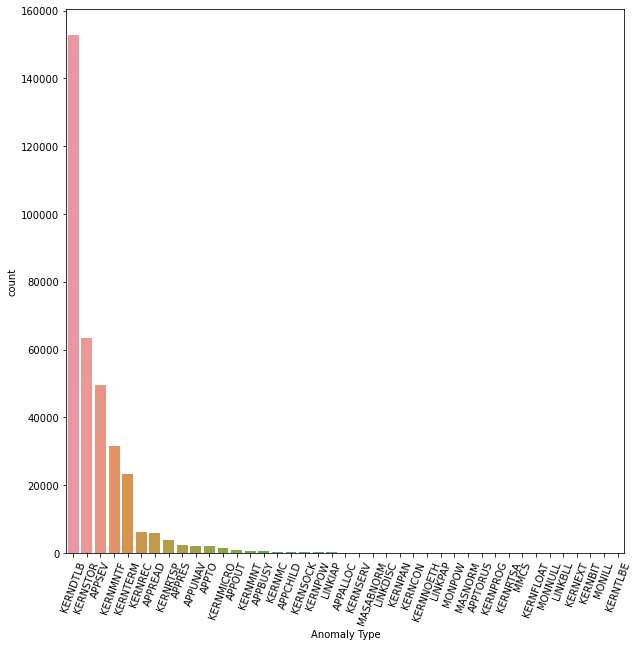

In [5]:
unique_anomaly_type = original_df['Anomaly Type'].unique()
print(unique_anomaly_type)
print(len(unique_anomaly_type))
print(original_df['Anomaly Type'].value_counts())

df_with_anomaly = original_df[original_df['Anomaly Type'] != '-']
anomaly_types = df_with_anomaly['Anomaly Type'].value_counts().index
fig, ax = plt.subplots(figsize=(10, 10))
op = sns.countplot(x='Anomaly Type', data=df_with_anomaly, order=anomaly_types)
op.set_xticklabels(labels = anomaly_types, rotation = 70)
plt.show()

['KERNEL' 'LINKCARD' 'APP' 'MMCS' 'HARDWARE' 'DISCOVERY' 'CMCS'
 'BGLMASTER' 'FATAL' 'MONITOR' 'SERV_NET' 'a' '0' 'iar']
KERNEL       4290181
APP           228536
DISCOVERY      97172
MMCS           88930
HARDWARE        5148
MONITOR         1681
LINKCARD        1170
FATAL            306
CMCS             211
BGLMASTER        145
a                  4
0                  4
SERV_NET           3
iar                2
Name: Component, dtype: int64


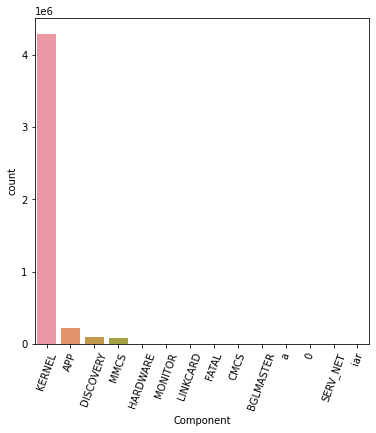

In [6]:
unique_components = original_df['Component'].unique()
print(unique_components)
print(original_df['Component'].value_counts())

component_types = original_df['Component'].value_counts().index
fig, ax = plt.subplots(figsize=(6, 6))
op = sns.countplot(x='Component', data=original_df, order=component_types)
op.set_xticklabels(labels = component_types, rotation = 70)
plt.show()

In [7]:
len(original_df[original_df['Component'].isin(['a', '0', 'iar'])])

10

['INFO' 'FATAL' 'WARNING' 'SEVERE' 'ERROR' 'Kill' 'FAILURE' 'single'
 'microseconds' '0x00544eb8,']
INFO            3701880
FATAL            854658
ERROR            112355
WARNING           23357
SEVERE            19213
FAILURE            1714
Kill                306
single                4
microseconds          4
0x00544eb8,           2
Name: Level, dtype: int64


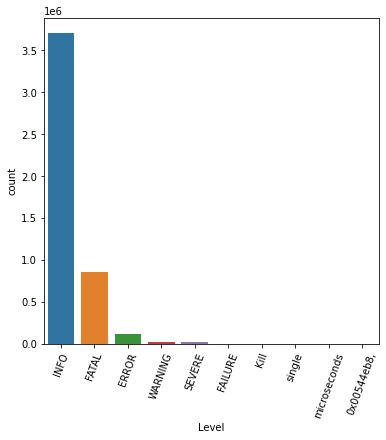

In [8]:
unique_levels = original_df['Level'].unique()
print(unique_levels)
print(original_df['Level'].value_counts())

log_levels = original_df['Level'].value_counts().index
fig, ax = plt.subplots(figsize=(6, 6))
op = sns.countplot(x='Level', data=original_df, order=log_levels)
op.set_xticklabels(labels=log_levels, rotation=70)
plt.show()

In [9]:
len(original_df[original_df['Level'].isin(['single', 'microseconds', '0x00544eb8'])])

8

['RAS' nan 'KERNEL' 'for' 'interrupts,' '(5438708)' '(4211594)']
RAS            4608962
KERNEL             306
for                  4
interrupts,          4
(5438708)            1
(4211594)            1
Name: Message Type, dtype: int64


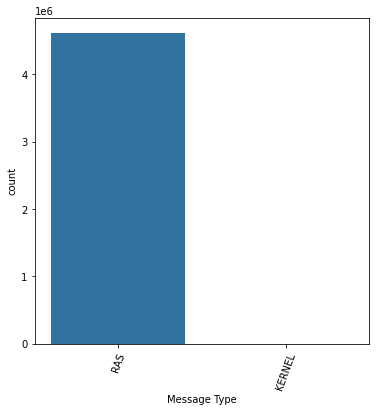

In [10]:
unique_message_types = original_df['Message Type'].unique()
print(unique_message_types)
print(original_df['Message Type'].value_counts())

df_with_msg_type = original_df[original_df['Message Type'].isin(['RAS', 'KERNEL', 'interrupts'])]
message_types = df_with_msg_type['Message Type'].value_counts().index
fig, ax = plt.subplots(figsize=(6, 6))
op = sns.countplot(x='Message Type', data=df_with_msg_type, order=message_types)
op.set_xticklabels(labels=message_types, rotation=70)
plt.show()

In [11]:
len(original_df[original_df['Message Type'].isin(['RAS', 'KERNEL', 'interrupts'])])

4609268

In [12]:
unique_nodes = original_df['Node'].unique()
print(unique_nodes)
print(original_df['Node'].value_counts())

['R02-M1-N0-C:J12-U11' 'R27-M1-L3-U18-C' 'R20-M1-N5-C:J17-U01' ...
 'R35-M1-NB' 'R22-M1' 'R22']
R30-M0-N9-C:J16-U01    152329
R02-M1-N0-C:J12-U11     64650
R37-M1-NC-C:J02-U11     35288
UNKNOWN_LOCATION        27039
R16-M1-N2-C:J17-U01     16921
                        ...  
R46-M0-L0                   1
R41-M0-L1                   1
R46-M0-L1                   1
R46-M1-L1                   1
R42-M1-L1                   1
Name: Node, Length: 69251, dtype: int64


[0 1]
0    4365033
1     348460
Name: Anomaly Label, dtype: int64
7.392818871270203


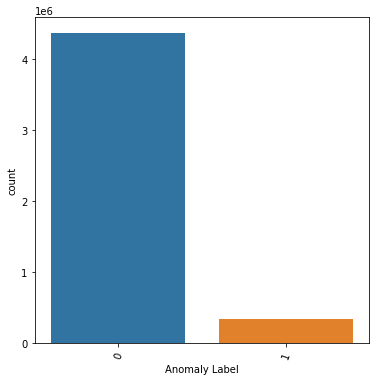

In [13]:
unique_anomaly_labels = original_df['Anomaly Label'].unique()
print(unique_anomaly_labels)
anomaly_distribution = original_df['Anomaly Label'].value_counts()
print(anomaly_distribution)
print(anomaly_distribution[1]/(anomaly_distribution[0]+anomaly_distribution[1])*100)

anomaly_labels = original_df['Anomaly Label'].value_counts().index
fig, ax = plt.subplots(figsize=(6, 6))
op = sns.countplot(x='Anomaly Label', data=original_df, order=anomaly_labels)
op.set_xticklabels(labels=anomaly_labels, rotation=70)
plt.show()

#### Bivariate Analysis

           Anomaly Label
Component               
KERNEL            284344
APP                63845
LINKCARD             206
BGLMASTER             47
MONITOR               15
MMCS                   3
0                      0
CMCS                   0
DISCOVERY              0
FATAL                  0
HARDWARE               0
SERV_NET               0
a                      0
iar                    0


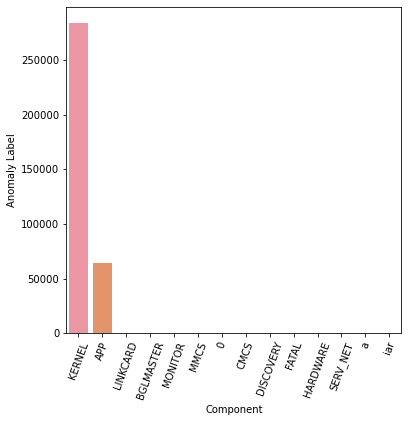

In [14]:
anomalies_by_component = original_df.groupby('Component').agg({'Anomaly Label': 'sum'}).sort_values(by='Anomaly Label', ascending=False)
print(anomalies_by_component)

fig, ax = plt.subplots(figsize=(6, 6))
op = sns.barplot(x=anomalies_by_component.index, y=anomalies_by_component['Anomaly Label'])
op.set_xticklabels(labels=anomalies_by_component.index, rotation=70)
plt.show()

              Anomaly Label
Level                      
FATAL                348398
FAILURE                  62
0x00544eb8,               0
ERROR                     0
INFO                      0
Kill                      0
SEVERE                    0
WARNING                   0
microseconds              0
single                    0


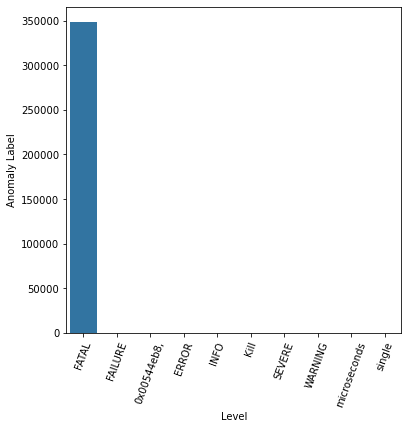

In [15]:
anomalies_by_levels = original_df.groupby('Level').agg({'Anomaly Label': 'sum'}).sort_values(by='Anomaly Label', ascending=False)
print(anomalies_by_levels)

fig, ax = plt.subplots(figsize=(6, 6))
op = sns.barplot(x=anomalies_by_levels.index, y=anomalies_by_levels['Anomaly Label'])
op.set_xticklabels(labels=anomalies_by_levels.index, rotation=70)
plt.show()

#### Time Series Analysis

In [16]:
print('Start Date: ', min(original_df['Timestamp']))
print('End Date: ', max(original_df['Timestamp']))

Start Date:  2005-06-03 15:42:50.363779
End Date:  2006-01-04 08:00:05.233639


Timestamp
2005-12-31    347987
2006-12-31       473
Freq: A-DEC, Name: Anomaly Label, dtype: int64


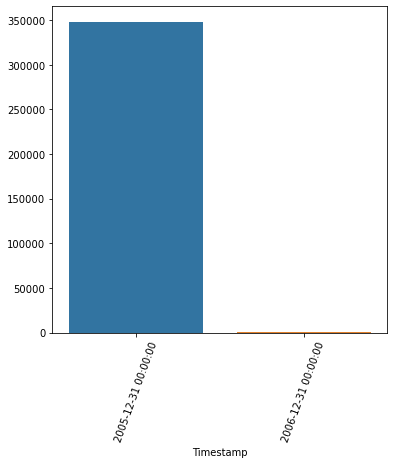

In [17]:
anomaly_over_timestamp = original_df.resample(rule='Y', on='Timestamp')['Anomaly Label'].sum()
print(anomaly_over_timestamp)

fig, ax = plt.subplots(figsize=(6, 6))
op = sns.barplot(x = anomaly_over_timestamp.index, y = anomaly_over_timestamp.values)
op.set_xticklabels(labels=anomaly_over_timestamp.index, rotation=70)
plt.show()

           Anomaly Label  Non-Anomaly Label
Timestamp                                  
2005-06           225153            1015779
2005-07             6729            1660600
2005-08            27113             373446
2005-09            34742             184535
2005-10             8434             144917
2005-11            28019             579412
2005-12            17797             403848
2006-01              473               2496


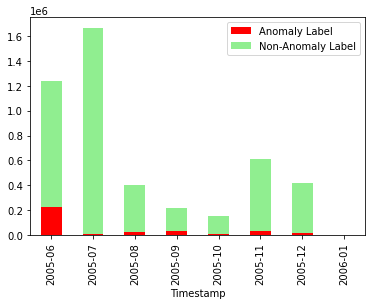

<Figure size 432x432 with 0 Axes>

In [55]:
anomaly_dict = { 1: 0, 0: 1}
original_df['Non-Anomaly Label'] = original_df['Anomaly Label'].map(anomaly_dict)

           Anomaly Label  Non-Anomaly Label
Timestamp                                  
2005-06           225153            1015779
2005-07             6729            1660600
2005-08            27113             373446
2005-09            34742             184535
2005-10             8434             144917
2005-11            28019             579412
2005-12            17797             403848
2006-01              473               2496


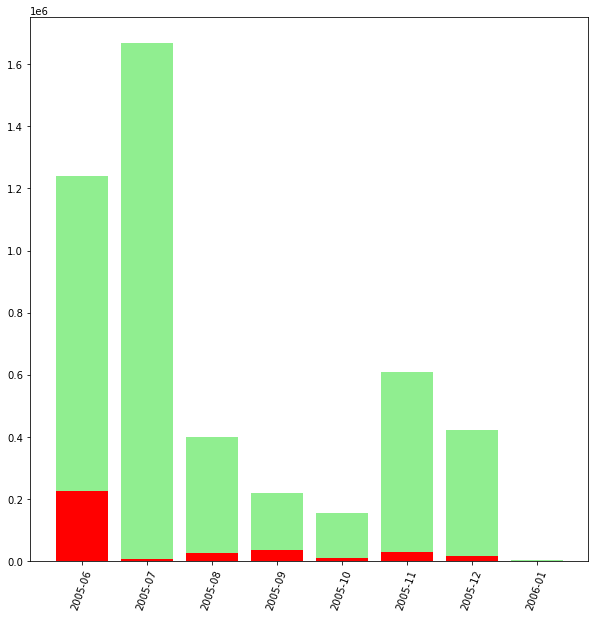

In [104]:
anomaly_grouping_by_month = original_df.groupby(original_df['Timestamp'].dt.strftime('%Y-%m')).agg({'Anomaly Label': 'sum', 'Non-Anomaly Label': 'sum'})
print(anomaly_grouping_by_month)

fig, ax = plt.subplots(figsize=(10, 10))
plt.bar(anomaly_grouping_by_month.index, anomaly_grouping_by_month['Anomaly Label'], color='red')
plt.bar(anomaly_grouping_by_month.index, anomaly_grouping_by_month['Non-Anomaly Label'], bottom= anomaly_grouping_by_month['Anomaly Label'], color='lightgreen')
plt.xticks(rotation=70)
plt.show()

Timestamp
2005-06-30    225153
2005-07-31      6729
2005-08-31     27113
2005-09-30     34742
2005-10-31      8434
2005-11-30     28019
2005-12-31     17797
2006-01-31       473
Freq: M, Name: Anomaly Label, dtype: int64


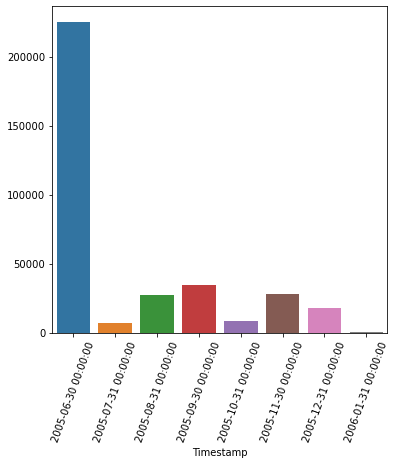

In [18]:
anomaly_over_timestamp = original_df.resample(rule='M', on='Timestamp')['Anomaly Label'].sum()
print(anomaly_over_timestamp)

fig, ax = plt.subplots(figsize=(6, 6))
plt.bar(df_200506_anomaly_grouping_by_month.index, df_200506_anomaly_grouping_by_month['Anomaly Label'], color='red')
plt.bar(df_200506_anomaly_grouping_by_month.index, df_200506_anomaly_grouping_by_month['Non-Anomaly Label'], bottom= df_200506_anomaly_grouping_by_month['Anomaly Label'], color='lightgreen')
plt.xticks(rotation=70)
plt.show()

In [ ]:
anomaly_grouping_by_date = original_df.groupby(original_df['Timestamp'].dt.strftime('%Y-%m-%d')).agg({'Anomaly Label': 'sum', 'Non-Anomaly Label': 'sum'})
print(anomaly_grouping_by_date)

fig, ax = plt.subplots(figsize=(50, 10))
plt.bar(anomaly_grouping_by_date.index, anomaly_grouping_by_date['Anomaly Label'], color='red')
plt.bar(anomaly_grouping_by_date.index, anomaly_grouping_by_date['Non-Anomaly Label'], bottom= anomaly_grouping_by_date['Anomaly Label'], color='lightgreen')
plt.xticks(rotation=70)
plt.show()

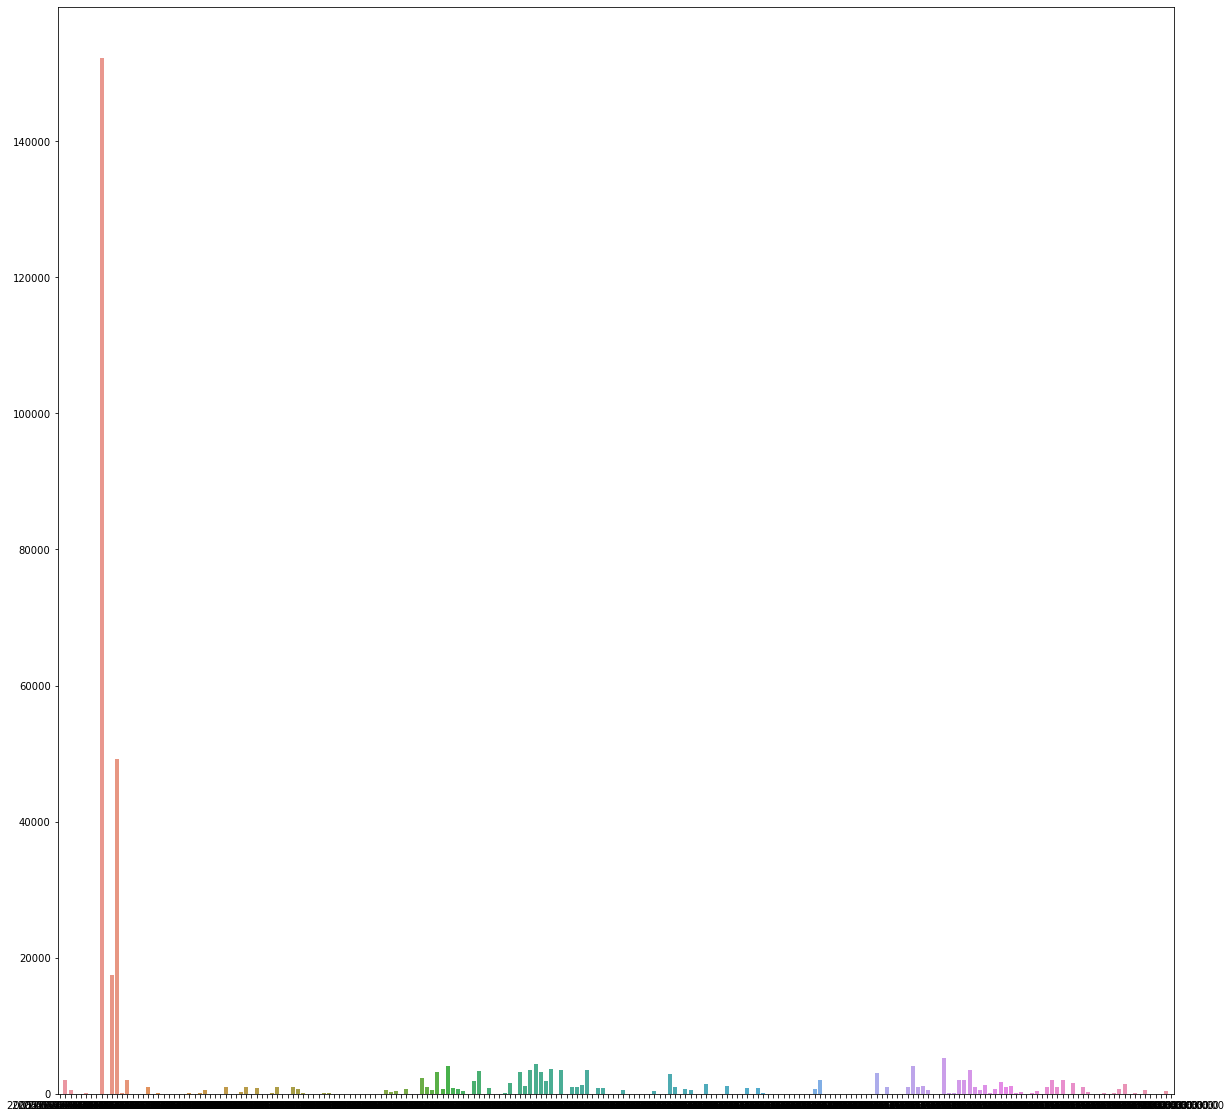

Timestamp
2005-06-11    152183
2005-06-14     49154
2005-06-13     17409
2005-11-21      5301
2005-09-03      4354
               ...  
2005-10-21         0
2005-07-16         0
2005-07-30         0
2005-07-22         0
2005-06-03         0
Name: Anomaly Label, Length: 216, dtype: int64


In [19]:
anomaly_over_timestamp = original_df.resample(rule='D', on='Timestamp')['Anomaly Label'].sum()

fig, ax = plt.subplots(figsize=(20, 20))
op = sns.barplot(x = anomaly_over_timestamp.index, y = anomaly_over_timestamp.values)
op.set(xlabel=None)
plt.show()

print(anomaly_over_timestamp.sort_values(ascending=False))

### EDA on Dataset filtered for 2005-06 to 2005-07

In [ ]:
df_200506 = original_df.loc[(original_df['Timestamp'] >= '2005-06-01') & (original_df['Timestamp'] < '2005-07-31')]

In [115]:
print(df_200506.shape)
df_200506.info()

(2908164, 12)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 2908164 entries, 0 to 2908163
Data columns (total 12 columns):
 #   Column             Dtype         
---  ------             -----         
 0   Anomaly Type       object        
 1   Timestamp (ms)     int64         
 2   Date               datetime64[ns]
 3   Node               object        
 4   Timestamp          datetime64[ns]
 5   Node Repeat        object        
 6   Message Type       object        
 7   Component          object        
 8   Level              object        
 9   Content            object        
 10  Anomaly Label      int64         
 11  Non-Anomaly Label  int64         
dtypes: datetime64[ns](2), int64(3), object(7)
memory usage: 352.9+ MB


#### Time Series Analysis

[0 1]
0    2676283
1     231881
Name: Anomaly Label, dtype: int64
7.9734499154793195


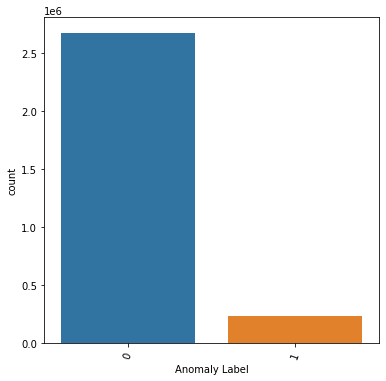

In [118]:
df_200506_unique_anomaly_labels = df_200506['Anomaly Label'].unique()
print(df_200506_unique_anomaly_labels)
df_200506_anomaly_distribution = df_200506['Anomaly Label'].value_counts()
print(df_200506_anomaly_distribution)
print(df_200506_anomaly_distribution[1]/(df_200506_anomaly_distribution[0]+df_200506_anomaly_distribution[1])*100)

fig, ax = plt.subplots(figsize=(6, 6))
op = sns.countplot(x='Anomaly Label', data=df_200506, order=df_200506['Anomaly Label'].value_counts().index)
op.set_xticklabels(labels=df_200506_unique_anomaly_labels, rotation=70)
plt.show()

           Anomaly Label  Non-Anomaly Label
Timestamp                                  
2005-06           225153            1015779
2005-07             6728            1660504


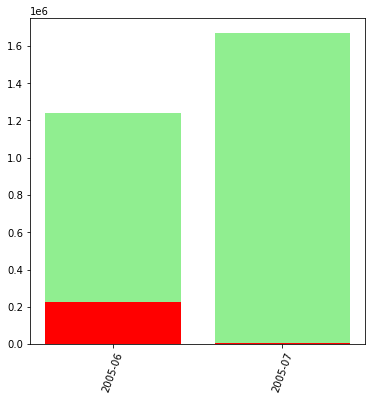

In [90]:
df_200506_anomaly_grouping_by_month = df_200506.groupby(df_200506['Timestamp'].dt.strftime('%Y-%m')).agg({'Anomaly Label': 'sum', 'Non-Anomaly Label': 'sum'})
print(df_200506_anomaly_grouping_by_month)

fig, ax = plt.subplots(figsize=(6, 6))
plt.bar(df_200506_anomaly_grouping_by_month.index, df_200506_anomaly_grouping_by_month['Anomaly Label'], color='red')
plt.bar(df_200506_anomaly_grouping_by_month.index, df_200506_anomaly_grouping_by_month['Non-Anomaly Label'], bottom= df_200506_anomaly_grouping_by_month['Anomaly Label'], color='lightgreen')
plt.xticks(rotation=70)
plt.show()

            Anomaly Label  Non-Anomaly Label
Timestamp                                   
2005-06-03              0              14733
2005-06-04           2040                693
2005-06-05            569             100811
2005-06-06              5              39457
2005-06-07              5              31919
2005-06-08            150              10526
2005-06-09              4              20279
2005-06-10              2               1460
2005-06-11         152183                486
2005-06-12              0               3420
2005-06-13          17409              19653
2005-06-14          49154             332407
2005-06-15            177              14795
2005-06-16           2043              22547
2005-06-17              4               4069
2005-06-18              3               5298
2005-06-19              2               3357
2005-06-20           1022              22841
2005-06-21              3              12000
2005-06-22            128              20998
2005-06-23

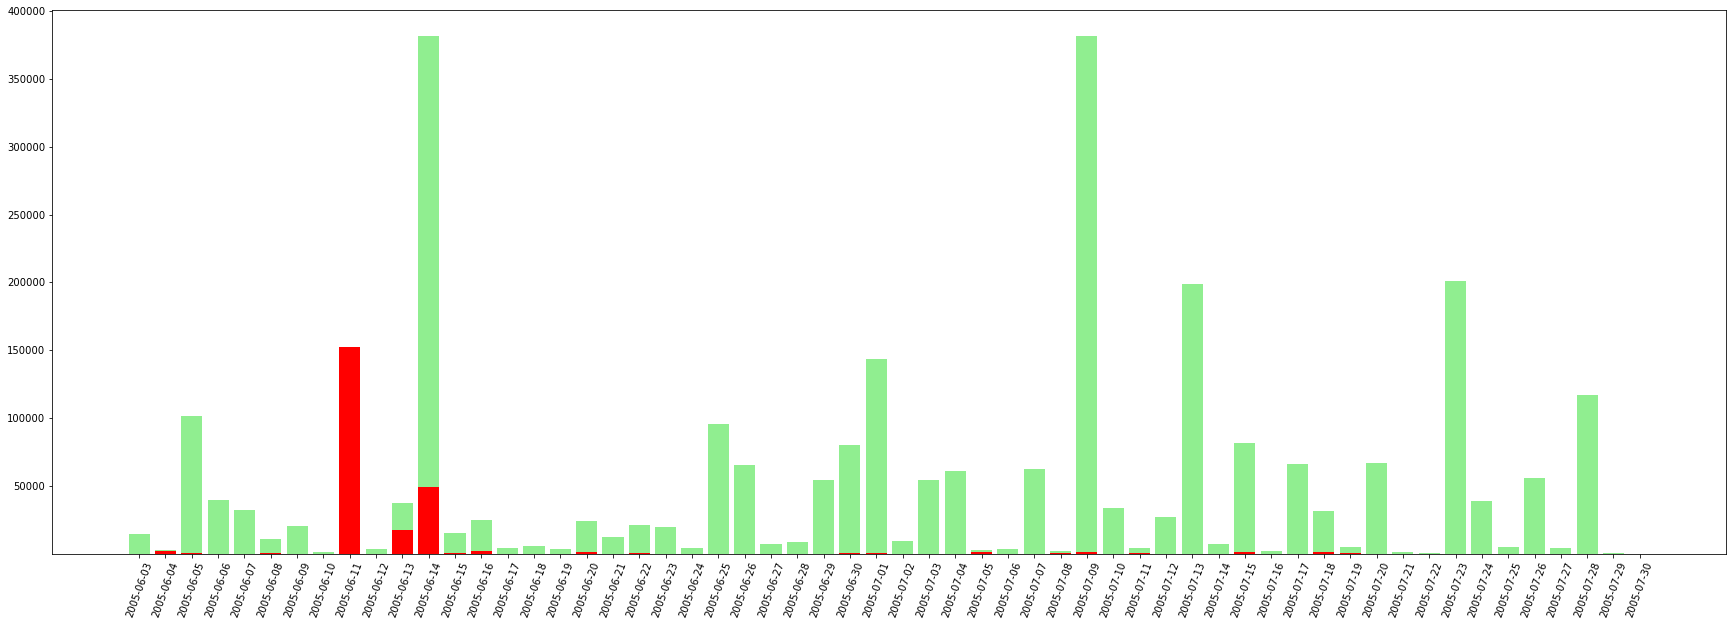

In [97]:
df_200506_anomaly_grouping_by_date = df_200506.groupby(df_200506['Timestamp'].dt.strftime('%Y-%m-%d')).agg({'Anomaly Label': 'sum', 'Non-Anomaly Label': 'sum'})
print(df_200506_anomaly_grouping_by_date)

fig, ax = plt.subplots(figsize=(30, 10))
plt.bar(df_200506_anomaly_grouping_by_date.index, df_200506_anomaly_grouping_by_date['Anomaly Label'], color='red')
plt.bar(df_200506_anomaly_grouping_by_date.index, df_200506_anomaly_grouping_by_date['Non-Anomaly Label'], bottom= df_200506_anomaly_grouping_by_date['Anomaly Label'], color='lightgreen')
plt.xticks(rotation=70)
plt.show()

#### Univariate Analysis

['-' 'APPREAD' 'KERNDTLB' 'KERNMC' 'KERNRTSP' 'KERNSTOR' 'APPCHILD'
 'APPALLOC' 'KERNSOCK' 'MASNORM' 'LINKDISC' 'KERNNOETH' 'KERNTERM'
 'APPUNAV' 'KERNPOW' 'KERNPROG' 'LINKPAP' 'APPBUSY' 'APPTORUS' 'MASABNORM'
 'KERNCON' 'APPSEV' 'MONPOW' 'MONNULL' 'KERNMNT' 'KERNMNTF' 'KERNMICRO'
 'APPRES' 'LINKIAP' 'KERNPAN' 'KERNEXT']
31
-            3230252
KERNDTLB      152723
KERNSTOR       63488
KERNMNTF       27424
KERNTERM       17187
APPSEV         16047
APPREAD         5983
KERNRTSP        3844
APPUNAV         2048
KERNMICRO       1486
KERNMNT          720
APPBUSY          512
APPCHILD         288
KERNMC           187
LINKIAP          158
APPALLOC         144
KERNPOW          144
KERNSOCK         117
APPRES           110
LINKDISC          24
MASABNORM         18
LINKPAP           12
KERNPAN           11
KERNNOETH          9
MASNORM            9
KERNCON            9
KERNPROG           3
MONPOW             3
MONNULL            2
APPTORUS           2
KERNEXT            1
Name: Anomaly Type, dty

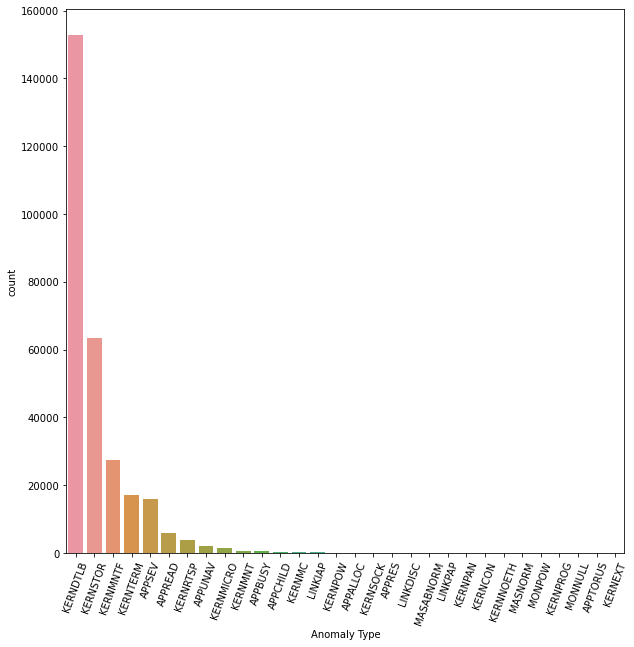

In [23]:
df_200506_unique_anomaly_type = df_200506['Anomaly Type'].unique()
print(df_200506_unique_anomaly_type)
print(len(df_200506_unique_anomaly_type))
print(df_200506['Anomaly Type'].value_counts())

df_200506_with_anomaly = df_200506[df_200506['Anomaly Type'] != '-']
fig, ax = plt.subplots(figsize=(10, 10))
df_200506_anomaly_types = df_200506_with_anomaly['Anomaly Type'].value_counts().index
op = sns.countplot(x='Anomaly Type', data=df_200506_with_anomaly, order=df_200506_anomaly_types)
op.set_xticklabels(labels = df_200506_anomaly_types, rotation = 70)
plt.show()

['KERNEL' 'LINKCARD' 'APP' 'MMCS' 'HARDWARE' 'DISCOVERY' 'CMCS'
 'BGLMASTER' 'FATAL' 'MONITOR' 'SERV_NET']
KERNEL       3219293
APP           121954
MMCS           88546
DISCOVERY      87879
HARDWARE        3756
LINKCARD        1158
FATAL            174
CMCS             130
BGLMASTER         67
MONITOR            5
SERV_NET           3
Name: Component, dtype: int64


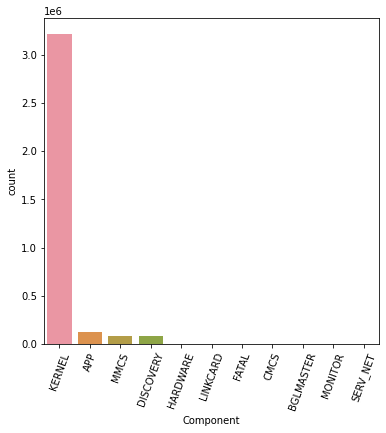

In [24]:
df_200506_unique_components = df_200506['Component'].unique()
print(df_200506_unique_components)
print(df_200506['Component'].value_counts())

df_200506_component_types = df_200506['Component'].value_counts().index
fig, ax = plt.subplots(figsize=(6, 6))
op = sns.countplot(x='Component', data=df_200506, order=df_200506_component_types)
op.set_xticklabels(labels = df_200506_component_types, rotation = 70)
plt.show()

['INFO' 'FATAL' 'WARNING' 'SEVERE' 'ERROR' 'Kill' 'FAILURE']
INFO       2658788
FATAL       717393
ERROR       109916
WARNING      19839
SEVERE       16821
Kill           174
FAILURE         34
Name: Level, dtype: int64


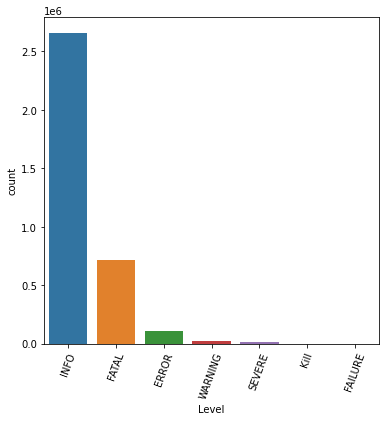

In [25]:
df_200506_unique_levels = df_200506['Level'].unique()
print(df_200506_unique_levels)
print(df_200506['Level'].value_counts())

df_200506_log_levels = df_200506['Level'].value_counts().index
fig, ax = plt.subplots(figsize=(6, 6))
op = sns.countplot(x='Level', data=df_200506, order=df_200506_log_levels)
op.set_xticklabels(labels=df_200506_log_levels, rotation=70)
plt.show()

#### Bivariate Analysis

           Anomaly Label
Component               
KERNEL            223887
APP                 7959
LINKCARD              30
BGLMASTER              3
MONITOR                2
CMCS                   0
DISCOVERY              0
FATAL                  0
HARDWARE               0
MMCS                   0


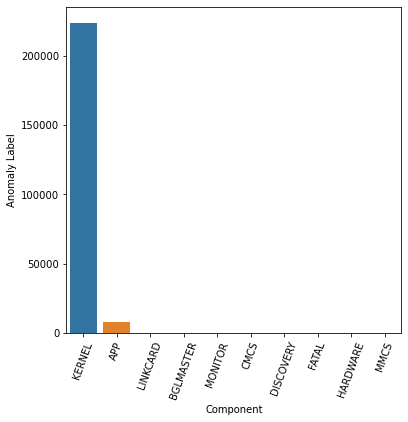

In [133]:
df_200506_anomalies_by_component = df_200506.groupby('Component').agg({'Anomaly Label': 'sum'}).sort_values(by='Anomaly Label', ascending=False)
print(df_200506_anomalies_by_component)

fig, ax = plt.subplots(figsize=(6, 6))
op = sns.barplot(x=df_200506_anomalies_by_component.index, y=df_200506_anomalies_by_component['Anomaly Label'])
op.set_xticklabels(labels=df_200506_anomalies_by_component.index, rotation=70)
plt.show()

         Anomaly Label
Level                 
FATAL           231876
FAILURE              5
ERROR                0
INFO                 0
Kill                 0
SEVERE               0
WARNING              0


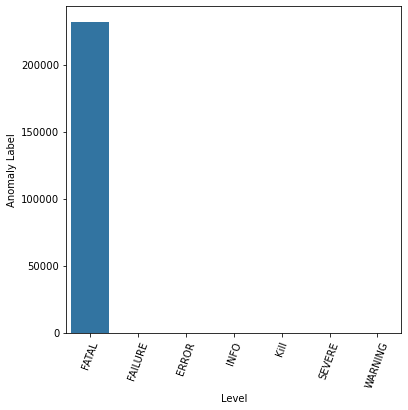

In [134]:
df_200506_anomalies_by_levels = df_200506.groupby('Level').agg({'Anomaly Label': 'sum'}).sort_values(by='Anomaly Label', ascending=False)
print(df_200506_anomalies_by_levels)

fig, ax = plt.subplots(figsize=(6, 6))
op = sns.barplot(x=df_200506_anomalies_by_levels.index, y=df_200506_anomalies_by_levels['Anomaly Label'])
op.set_xticklabels(labels=df_200506_anomalies_by_levels.index, rotation=70)
plt.show()

#### Upload Dataset to S3 Bucket

In [28]:
log_csv_file_name = 'bgl_200506.csv'
log_csv_file = path.abspath(path.join(project_root, input_dir, log_csv_file_name))
bucket_name = 'sagemaker-studio-326787221562-jycpwz9gs3f'
key = 'BGL_200506.csv'

client = boto3.client("s3")
df_200506.to_csv(log_csv_file)

client.upload_file(log_csv_file, bucket_name, key)

### EDA on Dataset filtered without 2005-07

In [108]:
df_no200507 = original_df[(original_df['Timestamp'].dt.year == 2005) & (original_df['Timestamp'].dt.month != 7)]

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3043195 entries, 0 to 4710523
Data columns (total 12 columns):
 #   Column             Dtype         
---  ------             -----         
 0   Anomaly Type       object        
 1   Timestamp (ms)     int64         
 2   Date               datetime64[ns]
 3   Node               object        
 4   Timestamp          datetime64[ns]
 5   Node Repeat        object        
 6   Message Type       object        
 7   Component          object        
 8   Level              object        
 9   Content            object        
 10  Anomaly Label      int64         
 11  Non-Anomaly Label  int64         
dtypes: datetime64[ns](2), int64(3), object(7)
memory usage: 301.8+ MB


In [114]:
print(df_no200507.shape)
df_no200507.info()

(3043195, 12)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 3043195 entries, 0 to 4710523
Data columns (total 12 columns):
 #   Column             Dtype         
---  ------             -----         
 0   Anomaly Type       object        
 1   Timestamp (ms)     int64         
 2   Date               datetime64[ns]
 3   Node               object        
 4   Timestamp          datetime64[ns]
 5   Node Repeat        object        
 6   Message Type       object        
 7   Component          object        
 8   Level              object        
 9   Content            object        
 10  Anomaly Label      int64         
 11  Non-Anomaly Label  int64         
dtypes: datetime64[ns](2), int64(3), object(7)
memory usage: 301.8+ MB


#### Time Series Analysis

[0 1]
0    2701937
1     341258
Name: Anomaly Label, dtype: int64
11.213806542137457


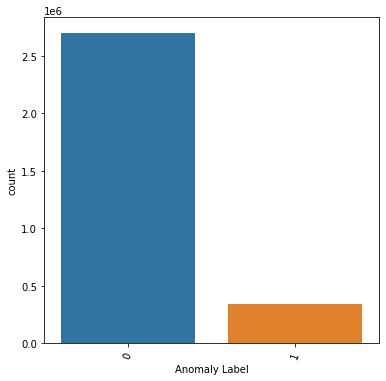

In [120]:
df_no200507_unique_anomaly_labels = df_no200507['Anomaly Label'].unique()
print(df_no200507_unique_anomaly_labels)
df_no200507_anomaly_distribution = df_no200507['Anomaly Label'].value_counts()
print(df_no200507_anomaly_distribution)
print(df_no200507_anomaly_distribution[1]/(df_no200507_anomaly_distribution[0]+df_no200507_anomaly_distribution[1])*100)

fig, ax = plt.subplots(figsize=(6, 6))
op = sns.countplot(x='Anomaly Label', data=df_no200507, order=df_no200507['Anomaly Label'].value_counts().index)
op.set_xticklabels(labels=df_no200507_unique_anomaly_labels, rotation=70)
plt.show()

           Anomaly Label  Non-Anomaly Label
Timestamp                                  
2005-06           225153            1015779
2005-08            27113             373446
2005-09            34742             184535
2005-10             8434             144917
2005-11            28019             579412
2005-12            17797             403848


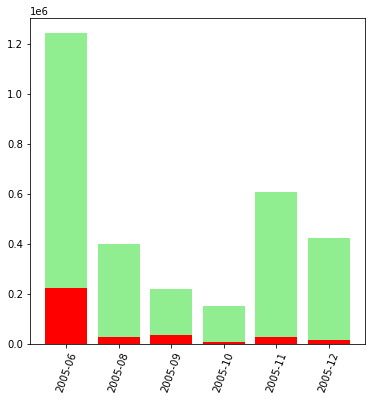

In [121]:
df_no200507_anomaly_grouping_by_month = df_no200507.groupby(df_no200507['Timestamp'].dt.strftime('%Y-%m')).agg({'Anomaly Label': 'sum', 'Non-Anomaly Label': 'sum'})
print(df_no200507_anomaly_grouping_by_month)

fig, ax = plt.subplots(figsize=(6, 6))
plt.bar(df_no200507_anomaly_grouping_by_month.index, df_no200507_anomaly_grouping_by_month['Anomaly Label'], color='red')
plt.bar(df_no200507_anomaly_grouping_by_month.index, df_no200507_anomaly_grouping_by_month['Non-Anomaly Label'], bottom= df_no200507_anomaly_grouping_by_month['Anomaly Label'], color='lightgreen')
plt.xticks(rotation=70)
plt.show()

            Anomaly Label  Non-Anomaly Label
Timestamp                                   
2005-06-03              0              14733
2005-06-04           2040                693
2005-06-05            569             100811
2005-06-06              5              39457
2005-06-07              5              31919
2005-06-08            150              10526
2005-06-09              4              20279
2005-06-10              2               1460
2005-06-11         152183                486
2005-06-12              0               3420
2005-06-13          17409              19653
2005-06-14          49154             332407
2005-06-15            177              14795
2005-06-16           2043              22547
2005-06-17              4               4069
2005-06-18              3               5298
2005-06-19              2               3357
2005-06-20           1022              22841
2005-06-21              3              12000
2005-06-22            128              20998
2005-06-23

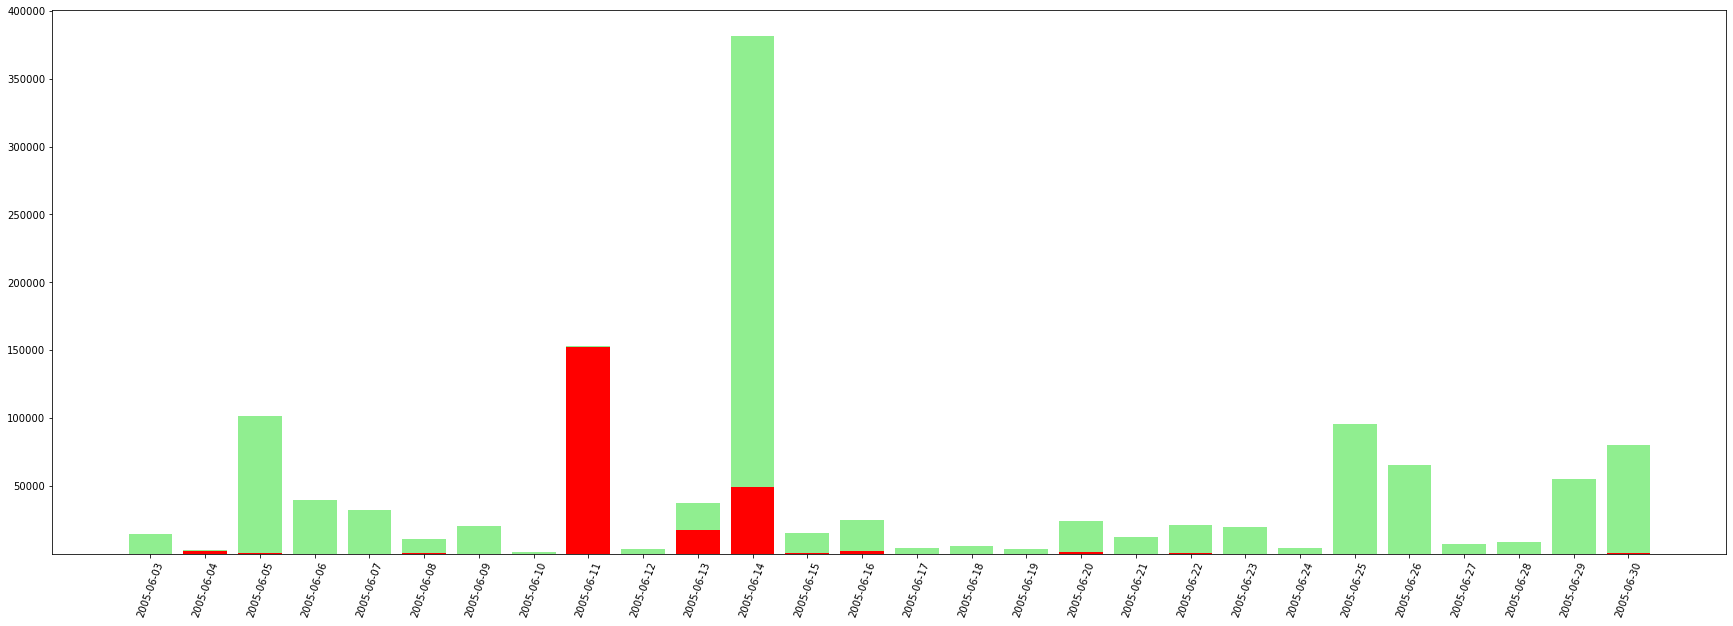

In [122]:
df_no200507_anomaly_grouping_by_date = df_no200507.groupby(df_200506['Timestamp'].dt.strftime('%Y-%m-%d')).agg({'Anomaly Label': 'sum', 'Non-Anomaly Label': 'sum'})
print(df_no200507_anomaly_grouping_by_date)

fig, ax = plt.subplots(figsize=(30, 10))
plt.bar(df_no200507_anomaly_grouping_by_date.index, df_no200507_anomaly_grouping_by_date['Anomaly Label'], color='red')
plt.bar(df_no200507_anomaly_grouping_by_date.index, df_no200507_anomaly_grouping_by_date['Non-Anomaly Label'], bottom= df_no200507_anomaly_grouping_by_date['Anomaly Label'], color='lightgreen')
plt.xticks(rotation=70)
plt.show()

#### Univariate Analysis

['-' 'APPREAD' 'KERNDTLB' 'KERNMC' 'KERNRTSP' 'KERNSTOR' 'APPCHILD'
 'APPALLOC' 'KERNSOCK' 'MASNORM' 'LINKDISC' 'KERNMNT' 'KERNMNTF'
 'KERNMICRO' 'APPSEV' 'APPRES' 'KERNCON' 'LINKPAP' 'LINKIAP' 'KERNNOETH'
 'MASABNORM' 'KERNTERM' 'APPUNAV' 'KERNPAN' 'KERNPOW' 'KERNEXT' 'MONPOW'
 'MONNULL' 'KERNPROG' 'KERNFLOAT' 'KERNBIT' 'KERNRTSA' 'MMCS' 'KERNREC'
 'APPTORUS' 'KERNSERV' 'MONILL' 'APPTO' 'LINKBLL' 'KERNTLBE' 'APPOUT']
41
-            2701937
KERNDTLB      152703
KERNSTOR       63491
APPSEV         49515
KERNMNTF       31198
KERNTERM       18587
KERNREC         6145
APPREAD         5983
KERNRTSP        3775
APPRES          2370
APPTO           1991
KERNMICRO       1503
APPUNAV         1024
APPOUT           816
KERNMNT          720
KERNMC           307
APPCHILD         288
KERNSOCK         196
LINKIAP          166
APPALLOC         144
KERNPOW           96
KERNSERV          94
MASABNORM         35
KERNPAN           18
KERNCON           15
LINKDISC          12
MONPOW            11
MASNORM 

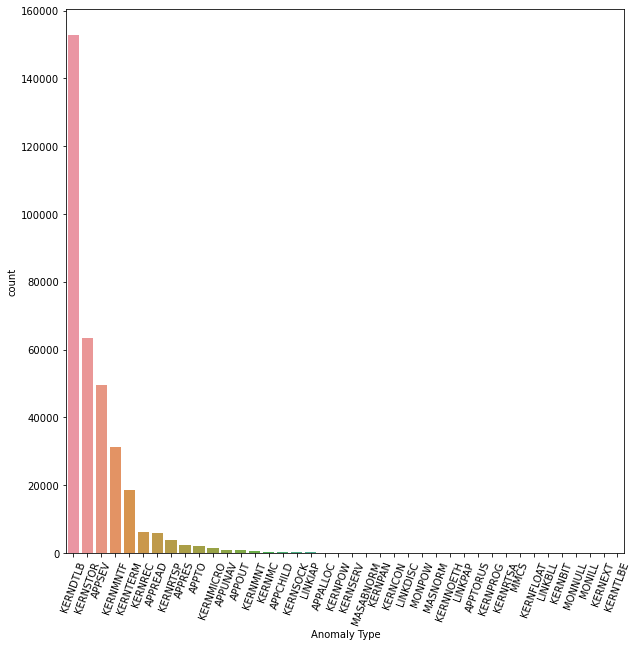

In [125]:
df_no200507_unique_anomaly_type = df_no200507['Anomaly Type'].unique()
print(df_no200507_unique_anomaly_type)
print(len(df_no200507_unique_anomaly_type))
print(df_no200507['Anomaly Type'].value_counts())

df_no200507_with_anomaly = df_no200507[df_no200507['Anomaly Type'] != '-']
fig, ax = plt.subplots(figsize=(10, 10))
df_no200507_anomaly_types = df_no200507_with_anomaly['Anomaly Type'].value_counts().index
op = sns.countplot(x='Anomaly Type', data=df_no200507_with_anomaly, order=df_no200507_anomaly_types)
op.set_xticklabels(labels = df_no200507_anomaly_types, rotation = 70)
plt.show()

['KERNEL' 'LINKCARD' 'APP' 'MMCS' 'HARDWARE' 'DISCOVERY' 'CMCS'
 'BGLMASTER' 'FATAL' 'SERV_NET' 'MONITOR' 'a' '0' 'iar']
KERNEL       2637402
APP           218016
DISCOVERY      92148
MMCS           88907
HARDWARE        3961
MONITOR         1679
LINKCARD         531
FATAL            232
CMCS             168
BGLMASTER        138
a                  4
0                  4
SERV_NET           3
iar                2
Name: Component, dtype: int64


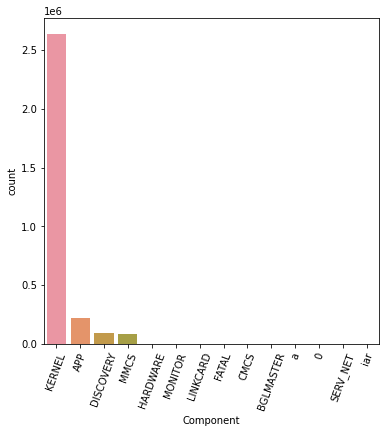

In [126]:
df_no200507_unique_components = df_no200507['Component'].unique()
print(df_no200507_unique_components)
print(df_no200507['Component'].value_counts())

df_no200507_component_types = df_no200507['Component'].value_counts().index
fig, ax = plt.subplots(figsize=(6, 6))
op = sns.countplot(x='Component', data=df_no200507, order=df_no200507_component_types)
op.set_xticklabels(labels = df_no200507_component_types, rotation = 70)
plt.show()

['INFO' 'FATAL' 'WARNING' 'SEVERE' 'ERROR' 'Kill' 'FAILURE' 'single'
 'microseconds' '0x00544eb8,']
INFO            2056937
FATAL            834787
ERROR            111452
WARNING           19832
SEVERE            18236
FAILURE            1709
Kill                232
single                4
microseconds          4
0x00544eb8,           2
Name: Level, dtype: int64


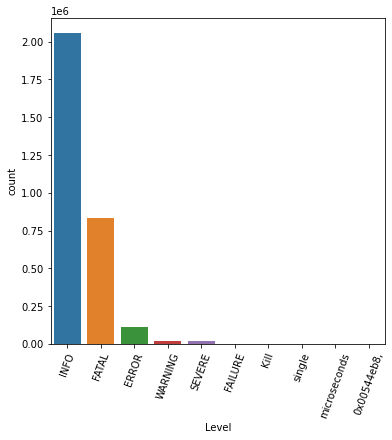

In [127]:
df_no200507_unique_levels = df_no200507['Level'].unique()
print(df_no200507_unique_levels)
print(df_no200507['Level'].value_counts())

df_no200507_log_levels = df_no200507['Level'].value_counts().index
fig, ax = plt.subplots(figsize=(6, 6))
op = sns.countplot(x='Level', data=df_no200507, order=df_no200507_log_levels)
op.set_xticklabels(labels=df_no200507_log_levels, rotation=70)
plt.show()

#### Bivariate Analysis

           Anomaly Label
Component               
KERNEL            278870
APP                62139
LINKCARD             188
BGLMASTER             45
MONITOR               13
MMCS                   3
0                      0
CMCS                   0
DISCOVERY              0
FATAL                  0
HARDWARE               0
SERV_NET               0
a                      0
iar                    0


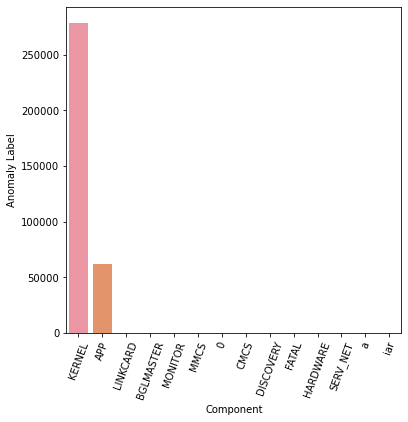

In [135]:
df_no200507_anomalies_by_component = df_no200507.groupby('Component').agg({'Anomaly Label': 'sum'}).sort_values(by='Anomaly Label', ascending=False)
print(df_no200507_anomalies_by_component)

fig, ax = plt.subplots(figsize=(6, 6))
op = sns.barplot(x=df_no200507_anomalies_by_component.index, y=df_no200507_anomalies_by_component['Anomaly Label'])
op.set_xticklabels(labels=df_no200507_anomalies_by_component.index, rotation=70)
plt.show()

              Anomaly Label
Level                      
FATAL                341200
FAILURE                  58
0x00544eb8,               0
ERROR                     0
INFO                      0
Kill                      0
SEVERE                    0
WARNING                   0
microseconds              0
single                    0


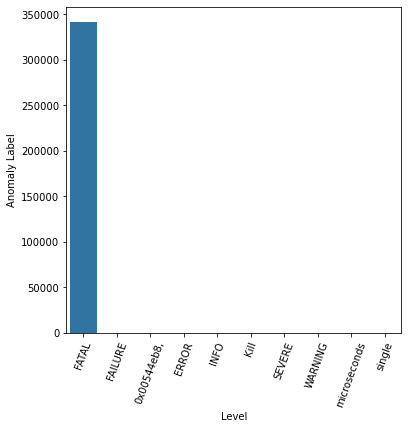

In [136]:
df_no200507_anomalies_by_levels = df_no200507.groupby('Level').agg({'Anomaly Label': 'sum'}).sort_values(by='Anomaly Label', ascending=False)
print(df_no200507_anomalies_by_levels)

fig, ax = plt.subplots(figsize=(6, 6))
op = sns.barplot(x=df_no200507_anomalies_by_levels.index, y=df_no200507_anomalies_by_levels['Anomaly Label'])
op.set_xticklabels(labels=df_no200507_anomalies_by_levels.index, rotation=70)
plt.show()

#### Upload Dataset to S3 Bucket

In [138]:
log_csv_file_name = 'bgl_no200507.csv'
log_csv_file = path.abspath(path.join(project_root, input_dir, log_csv_file_name))
bucket_name = 'sagemaker-studio-326787221562-jycpwz9gs3f'
key = 'BGL_no200507.csv'

client = boto3.client("s3")
df_no200507.to_csv(log_csv_file)

client.upload_file(log_csv_file, bucket_name, key)